In [1]:
import csv
import numpy as np
from numpy.linalg import inv 
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from numpy.linalg import eig
# reading csv file to extract data into numpy array
with open('railway_data.csv', 'r') as f:
    railway = list(csv.reader(f, delimiter=','))
    rail_data = np.array(railway)

# separating feature and label
X = rail_data[1:][:,[0,2,3,4,5,6]]
for i in range(X.shape[0]):
    if(X[i][4] == 'female'):
        X[i][4] = '0'
    else:
        X[i][4] = '1'
for i in range(X.shape[0]):
    if(X[i][3] == 'FIRST_AC'):
        X[i][3] = '0'
    elif(X[i][3] == 'SECOND_AC'):
        X[i][3] = '1'
    else:
        X[i][3] = '2'
        
X = X.astype('float')
Y = rail_data[1:,1].astype('float')
classes = [0,1]

In [2]:
X = (X-np.mean(X,axis =0))/np.std(X,axis =0)
print (X.shape)

(1309, 6)


In [3]:
print (Y)

[0. 0. 1. ... 1. 1. 1.]


In [8]:
for i in range(Y.shape[0]):
    if(Y[i] == 0):
        Y[i] = -1

In [15]:
a = np.array(range(1,101))
a = a/100
b = np.array(range(1,100))
c = a.tolist()+b.tolist()

In [17]:
ACC = []
for i in range(len(c)):
    clf = SVC(gamma = c[i])
    clf.fit(X,Y)
    acc = 0
    for i in range(X.shape[0]):
        if(clf.predict(X[i].reshape(1,6)) == Y[i]):
            acc += 1
    ACC.append(acc/X.shape[0]*100)
    print (acc/X.shape[0]*100)

78.38044308632544
78.76241405653171
79.37356760886173
79.44996180290298
79.75553857906799
80.13750954927426
80.061115355233
79.98472116119176
80.061115355233
80.061115355233
80.13750954927426
80.21390374331551
80.36669213139801
80.36669213139801
80.44308632543927
80.82505729564554
81.43621084797556
81.5126050420168
81.66539343009931
81.74178762414056
81.89457601222307
82.12375859434682
82.20015278838808
82.35294117647058
82.27654698242934
82.42933537051184
82.12375859434682
82.12375859434682
82.12375859434682
82.20015278838808
82.20015278838808
82.20015278838808
82.42933537051184
82.42933537051184
82.50572956455309
82.58212375859435
82.58212375859435
82.58212375859435
82.58212375859435
82.6585179526356
82.73491214667685
82.73491214667685
82.73491214667685
82.8113063407181
82.8113063407181
82.8113063407181
82.8113063407181
82.73491214667685
82.73491214667685
82.73491214667685
82.8113063407181
82.73491214667685
82.73491214667685
82.8113063407181
82.88770053475936
82.9640947288006
83.2696

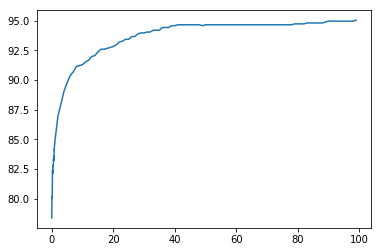

In [19]:
import matplotlib.pyplot as plt
plt.figure('Train_SVM_gaussian')
plt.plot(c,ACC)
plt.savefig('Train_SVM_gaussian')